# BOOSTING, STACKING & CASCADING

## Content

```
1.  Use Case Intro
2.  Ensemble Learning & Bagging Recap
3.  Intro to Boosting
4.  AdaBoost
5.  GBDT (Gradient-Boosted Decision Trees)
6.  XGBoost
7.  LightGBM
8.  Stacking
9.  Cascading
```

## Use Case Intro

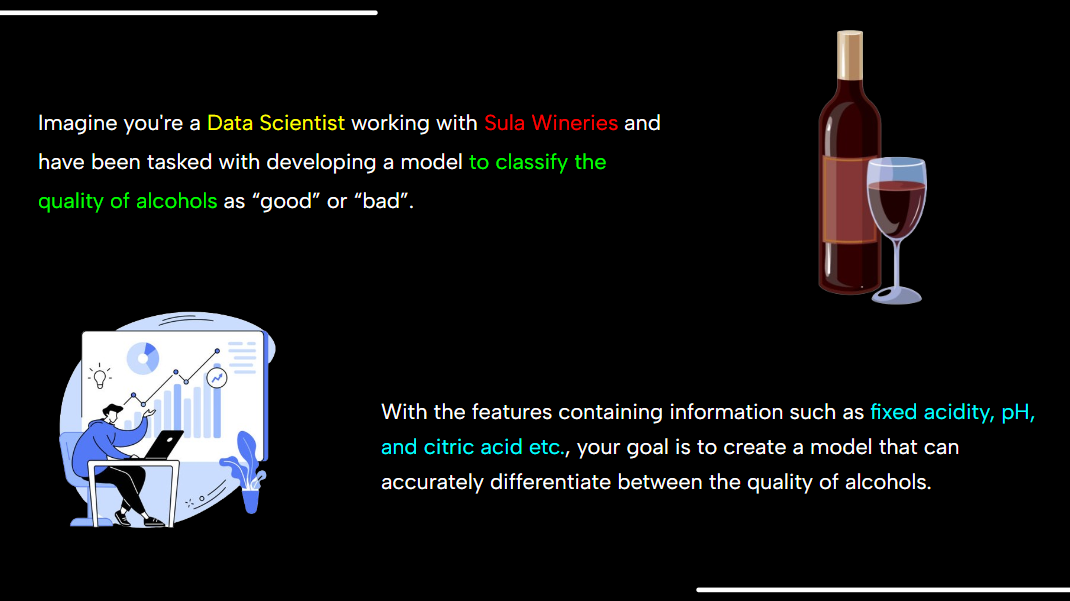

For this, we'll be using the [Red Wine Dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data).

To do our job properly, we'll have to take a look at the features.

```
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
12 - quality (score between 0 and 10)
```

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn import preprocessing

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from warnings import filterwarnings
filterwarnings(action='ignore')

### Loading in the dataset

In [ ]:
!gdown 1J42OFA1C7Iat-okvziODWZQvRwd72c8n

Downloading...
From: https://drive.google.com/uc?id=1J42OFA1C7Iat-okvziODWZQvRwd72c8n
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 85.1MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/winequality-red.csv')

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Transforming Target Variable and Preparing Features

Here, a value of 1  is assigned if the corresponding value in the 'quality' column is greater than or equal to 7, indicating a "good quality," and assigns a value of 0 otherwise.

In [ ]:
df['goodquality'] = [1 if x>=7 else 0 for x in df['quality']]

X = df.drop(['quality', 'goodquality'], axis = 1)
Y = df['goodquality']

In [ ]:
df.goodquality.value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.25, random_state = 0)

In the previous lesson, we studied an Ensemble technique called Bagging and the Random Forest algorithm. Now, we'll read about the other ensemble techniques.

---

## Ensemble Learning & Bagging Recap

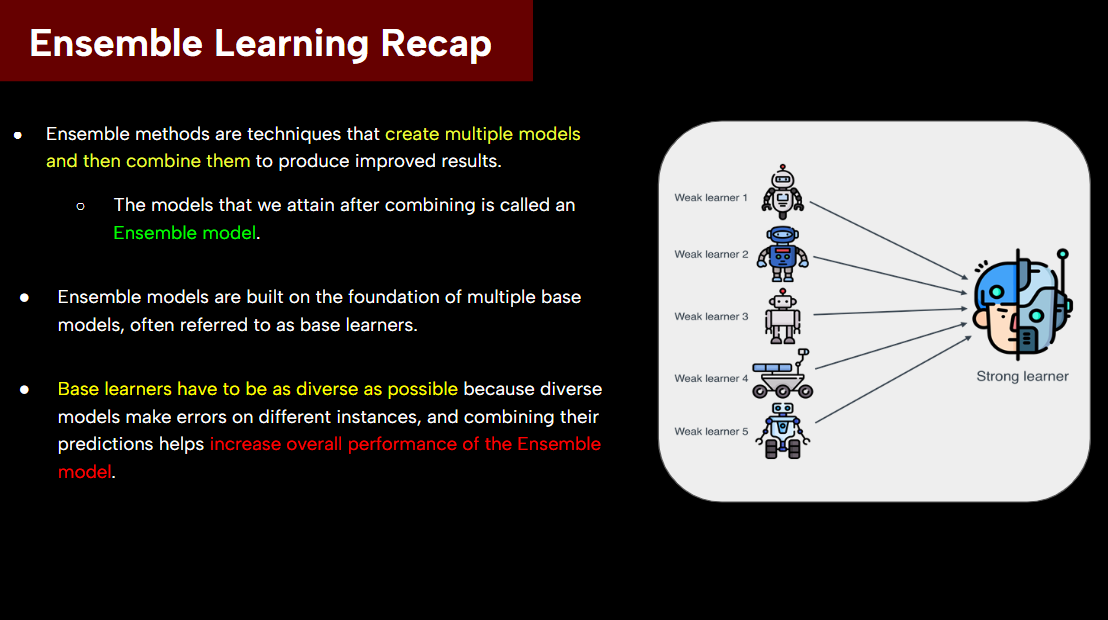

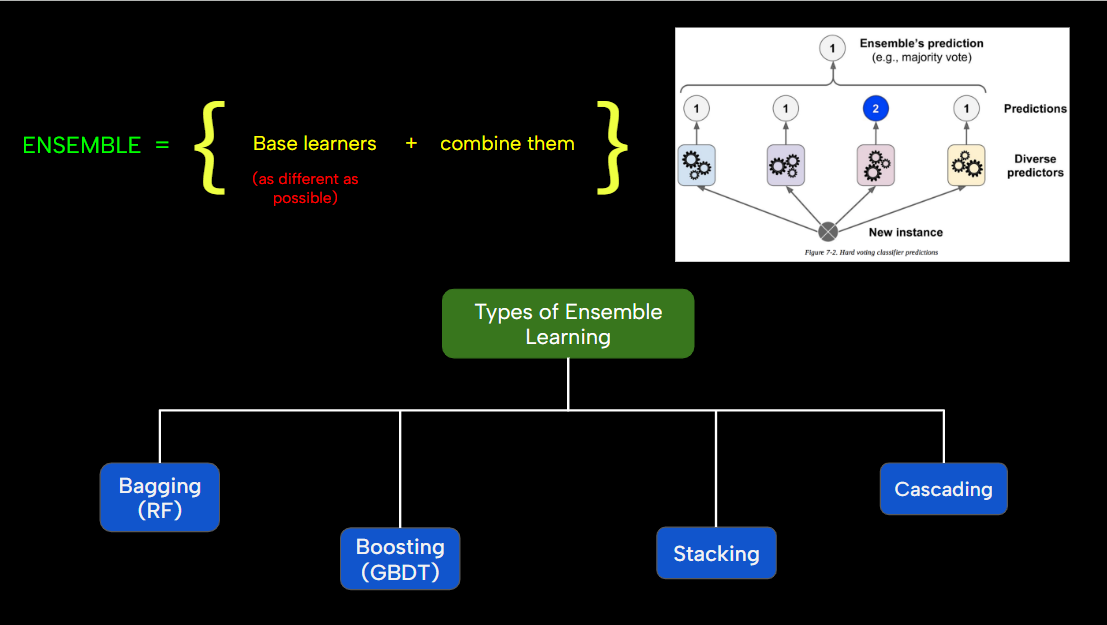

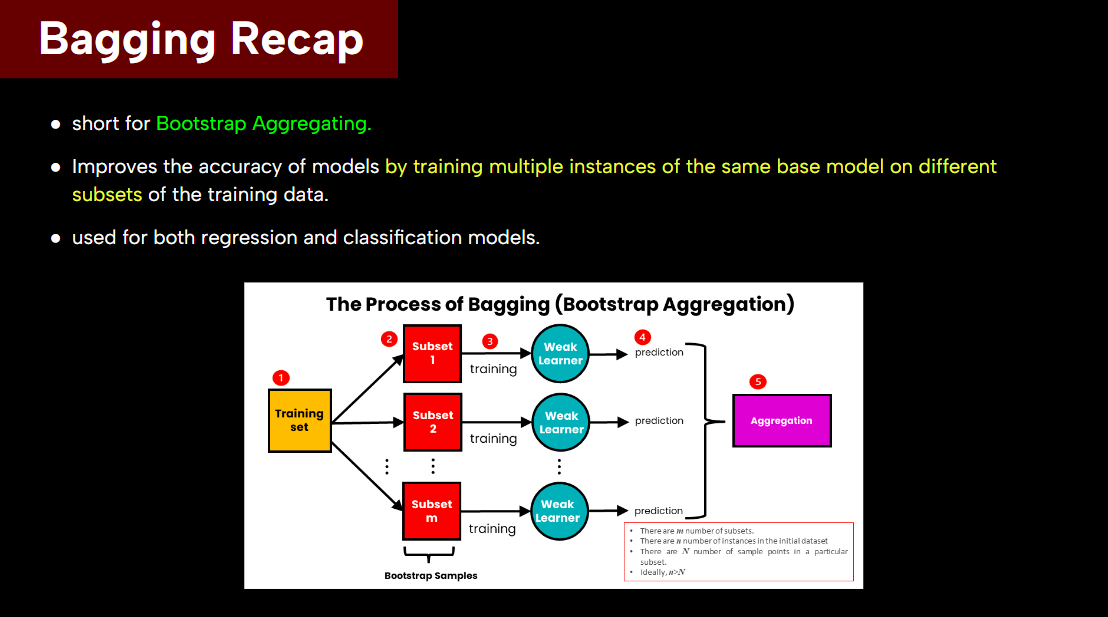

---

## Intro to Boosting

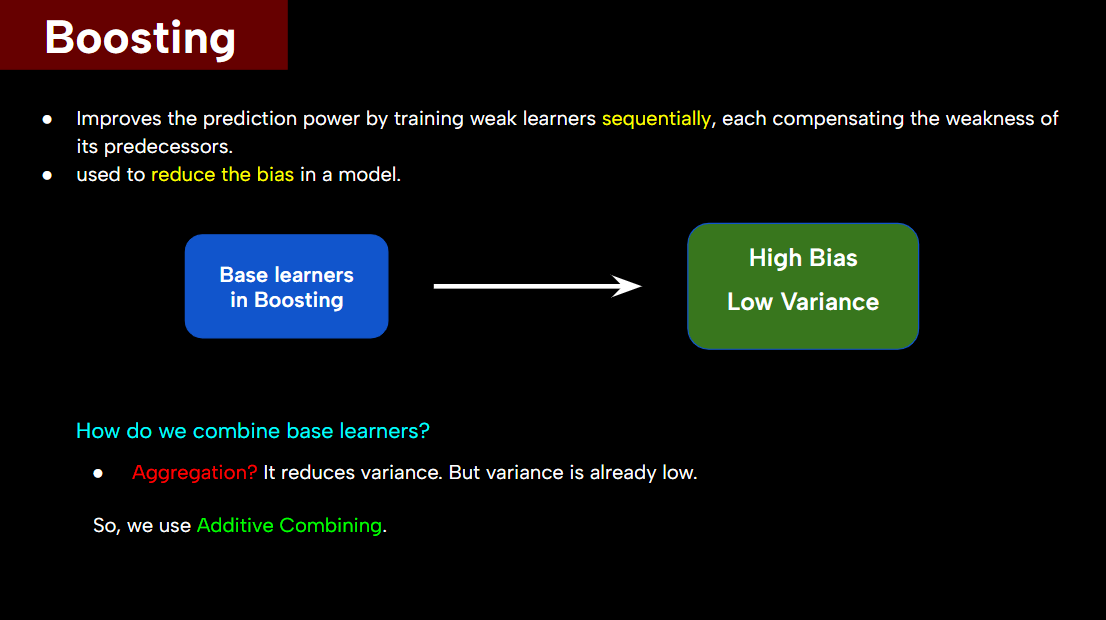

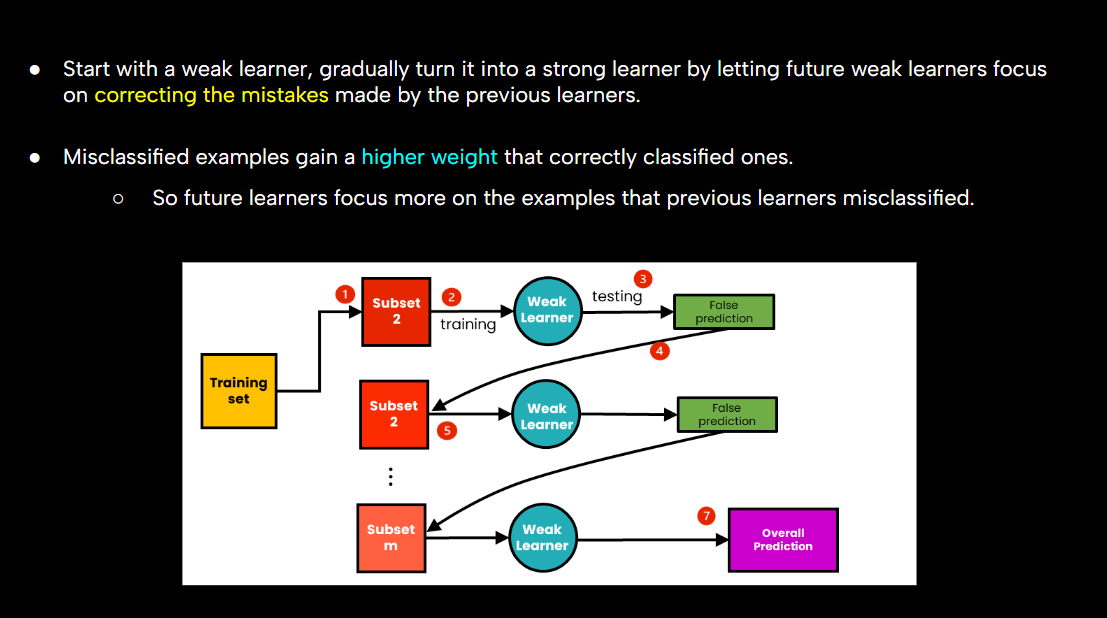

### Steps involved in Boosting

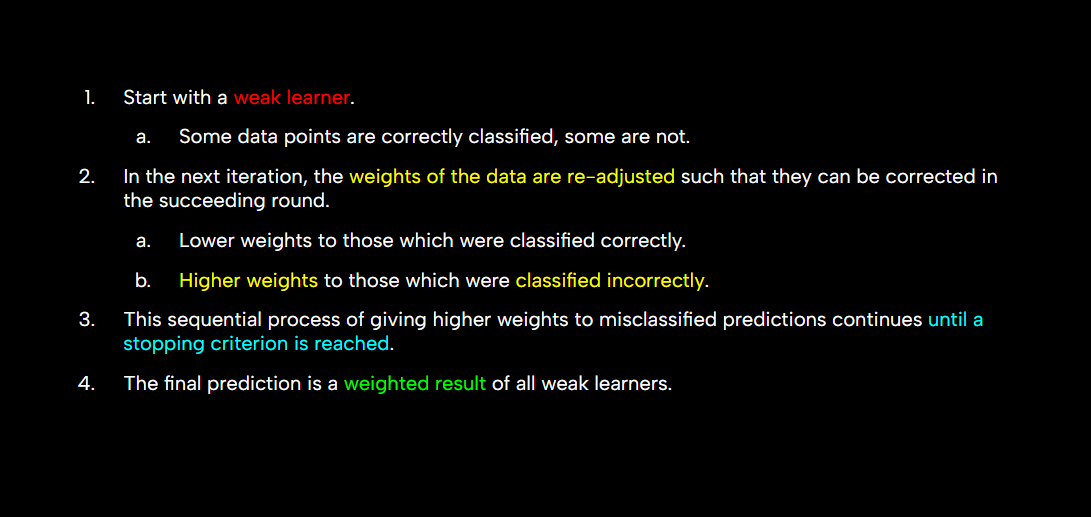

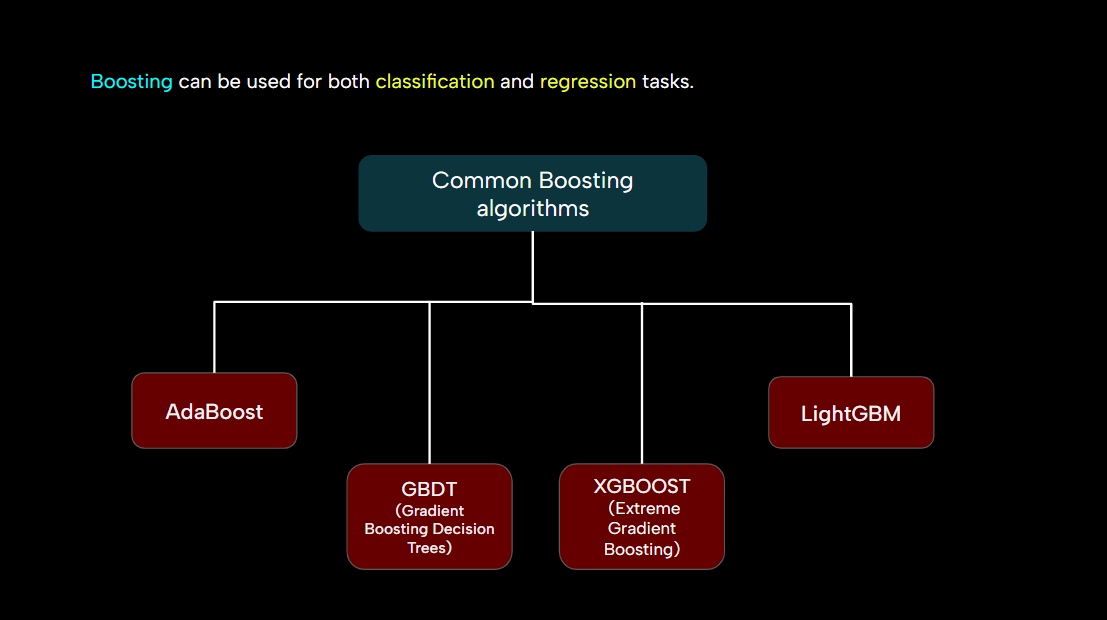

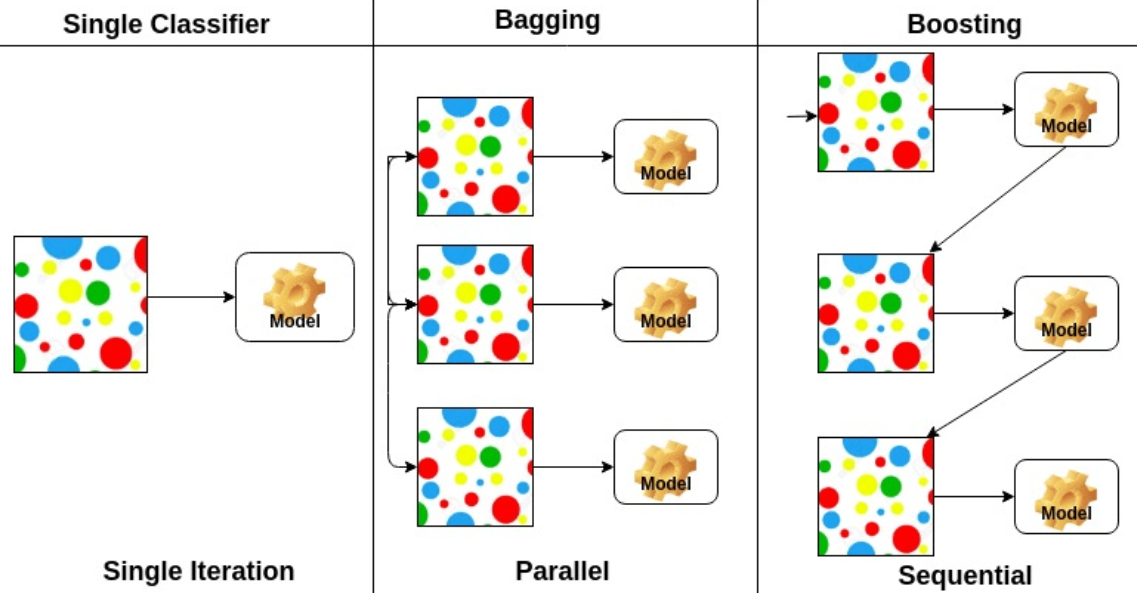

---

## AdaBoost

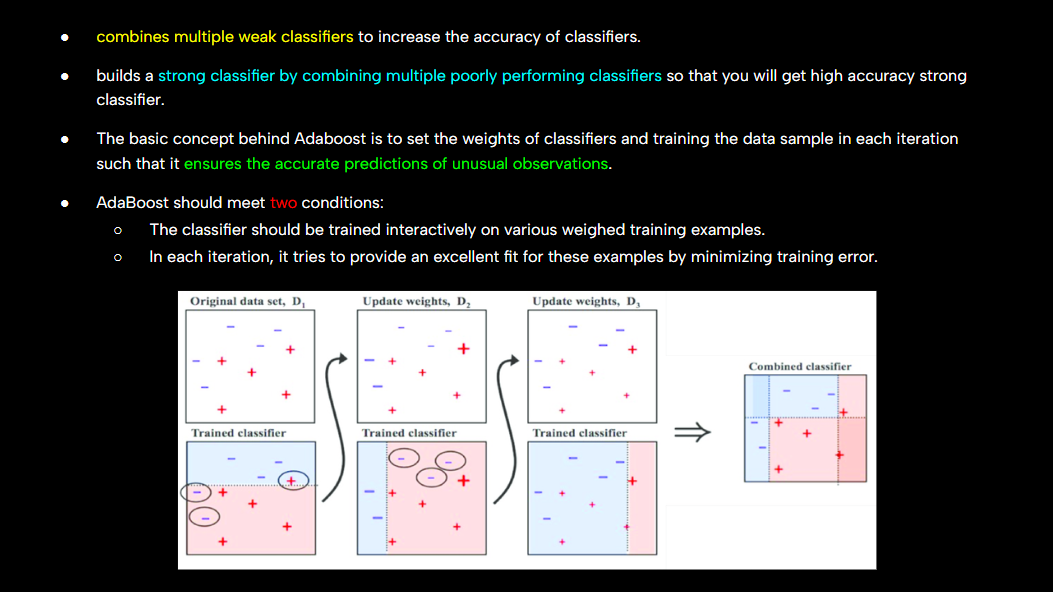

### How does the AdaBoost algo work?

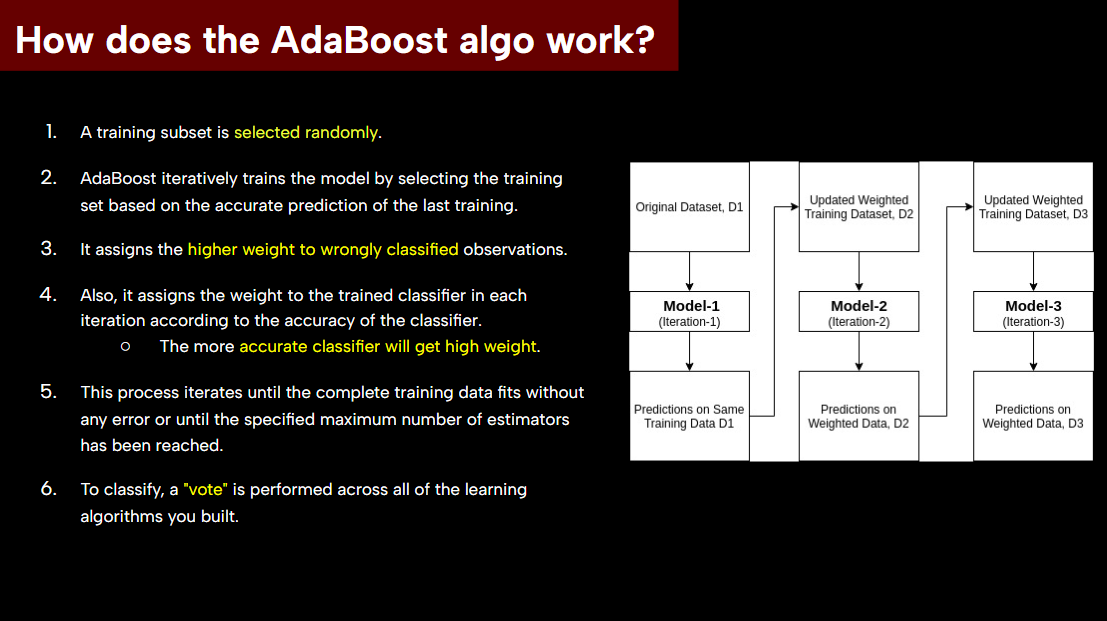

### AdaBoost Hyperparameters

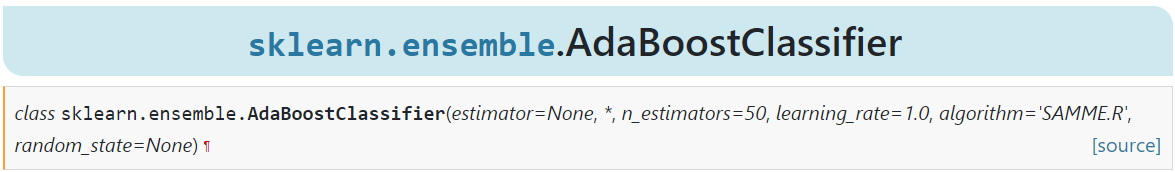

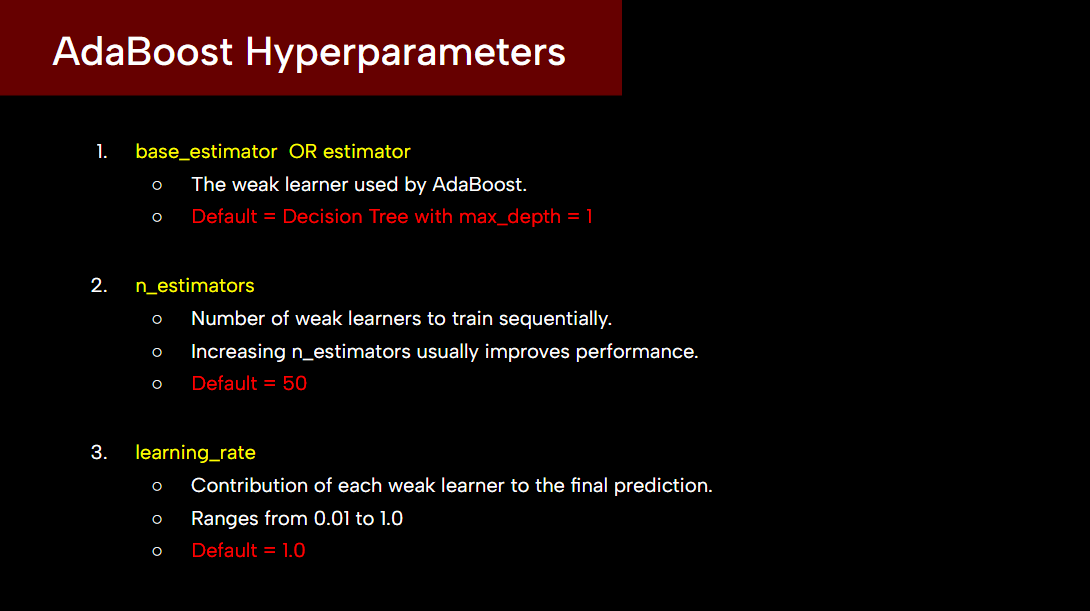

<br>

### AdaBoost Pros and Cons

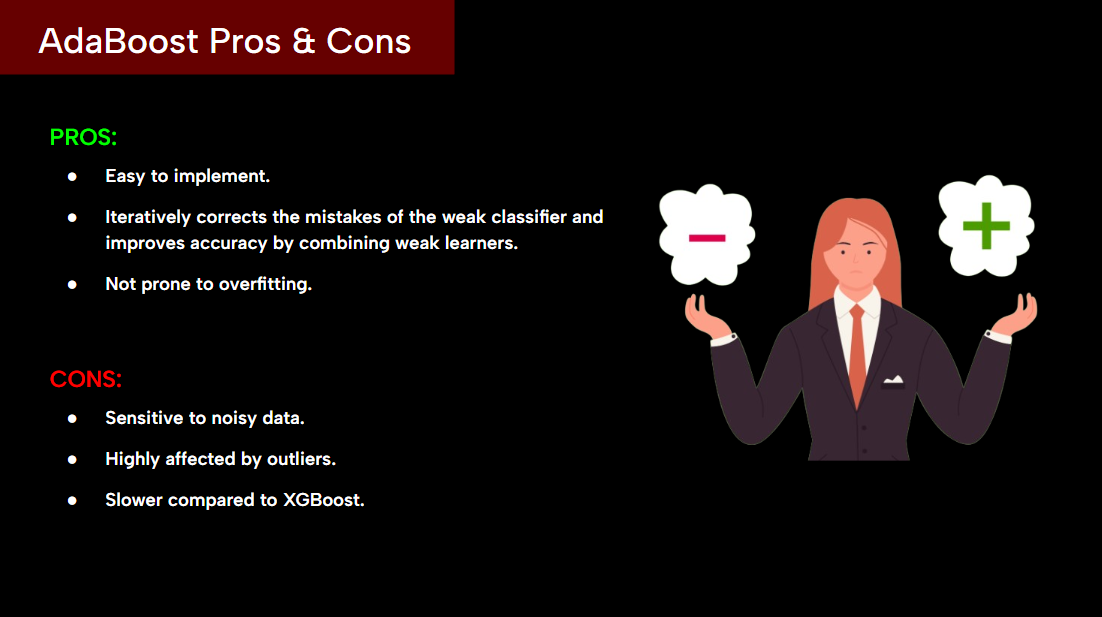

### AdaBoost Implementation

#### Importing Libraries

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Creating and fitting the model

In [ ]:
# Create adaboost classifier object
model = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
print("F1 score:",metrics.f1_score(Y_test, y_pred, average='weighted'))

F1 score: 0.8889044943820226
Accuracy Score: 0.89


#### Developing the Confusion matrix

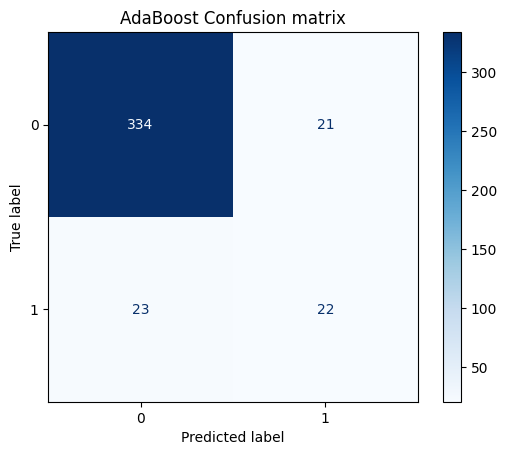

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title('AdaBoost Confusion matrix');

#### Using differnt Base Learners

##### SVC as base learner

In [ ]:
# Import Support Vector Classifier
from sklearn.svm import SVC

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc = SVC(probability=True, kernel='linear')

# Create adaboost classifer object
model1 = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model1.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model1.predict(X_test)

# F1 Score
print("\nF1:",metrics.f1_score(Y_test, y_pred, average='weighted'))

# Accuracy Score
print("\nAccuracy:",metrics.accuracy_score(Y_test, y_pred))


F1: 0.8346026490066225

Accuracy: 0.8875


##### Random Forest as base learner

In [ ]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, random_state=0)

# Create adaboost classifer object
model2 = AdaBoostClassifier(n_estimators=50, base_estimator=rfc, learning_rate=1)

# Train Adaboost Classifer
model2.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model2.predict(X_test)

# F1 Score
print("\nF1 Score:",metrics.f1_score(Y_test, y_pred, average='weighted'))

# Accuracy Score
print("\nAccuracy:",metrics.accuracy_score(Y_test, y_pred))


F1 Score: 0.9177183381728837

Accuracy: 0.925


---

## GBDT (Gradient-Boosted Decision Trees)

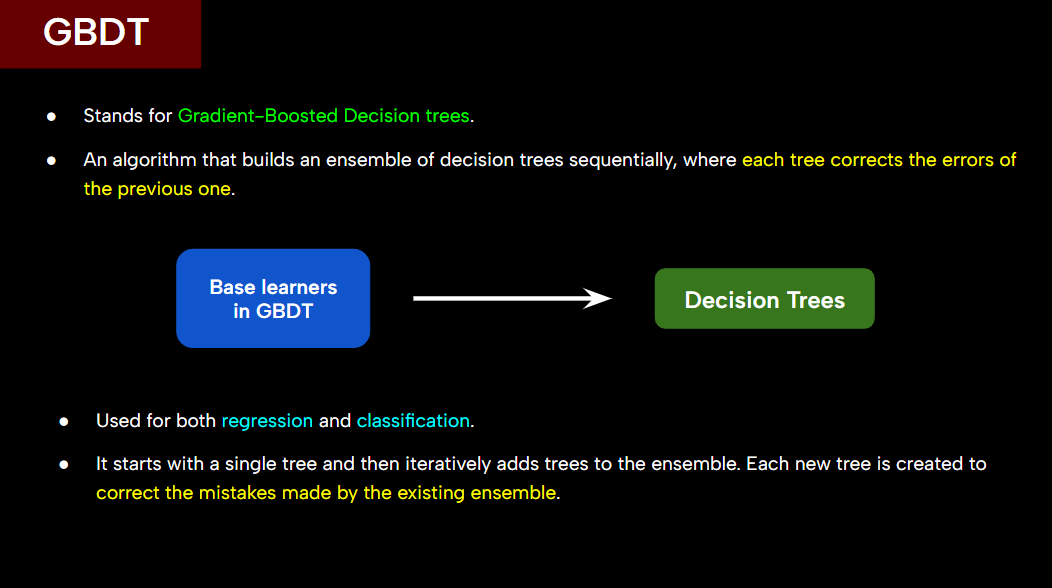

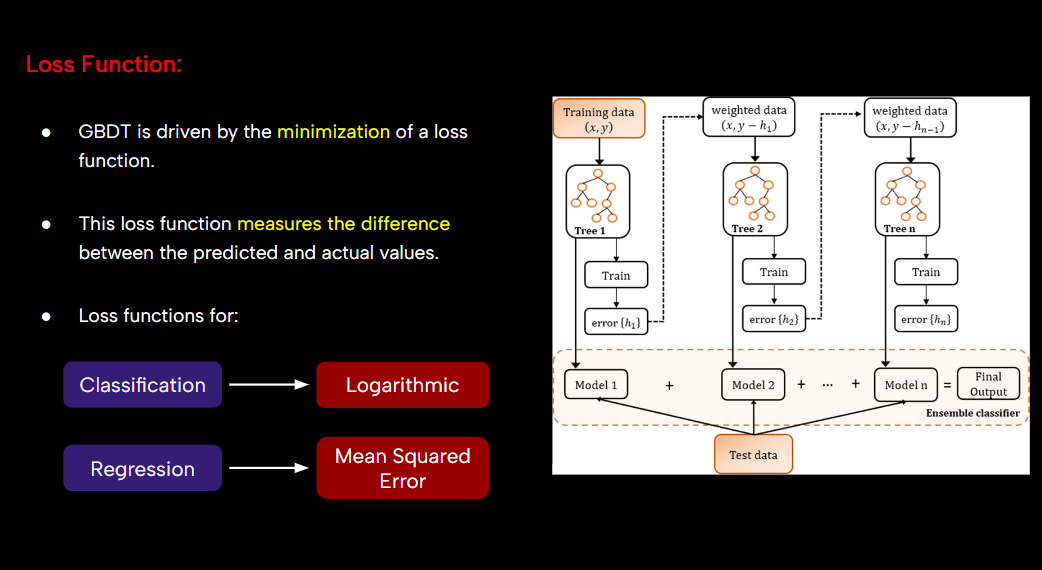

<br>

### How does the GBDT algo work?

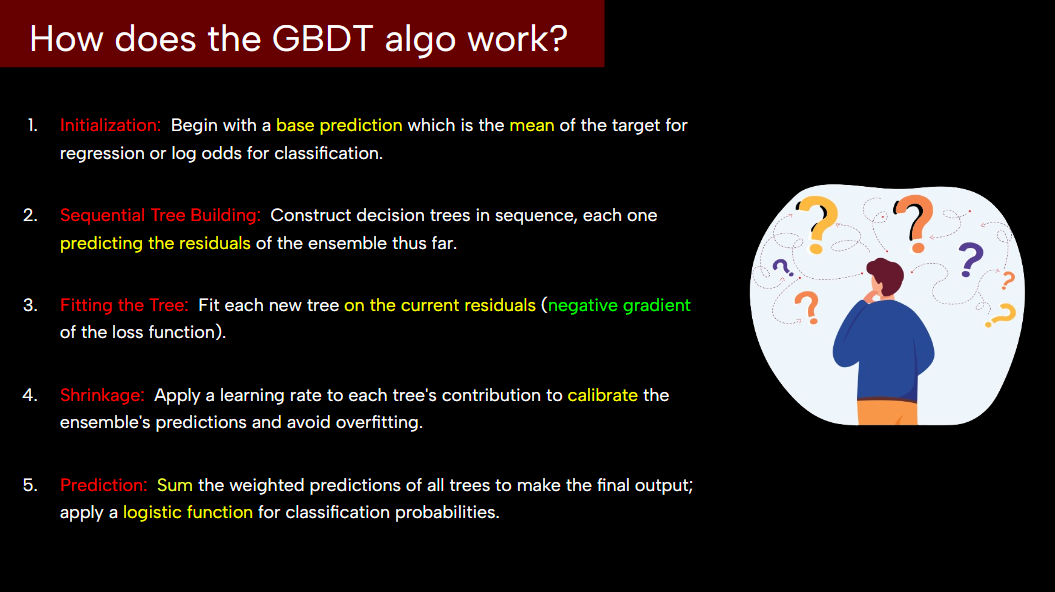

### GBDT Hyperparameters

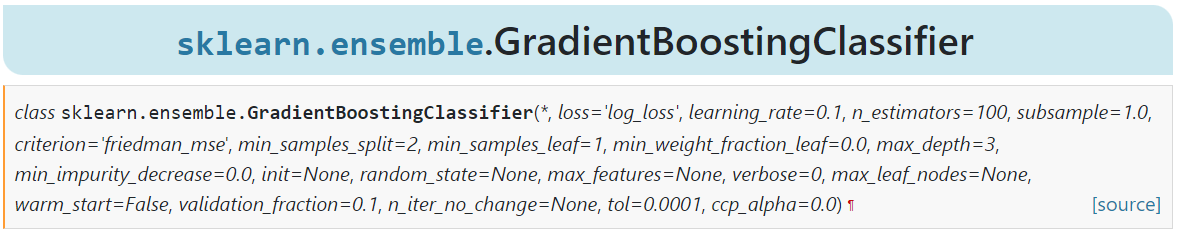

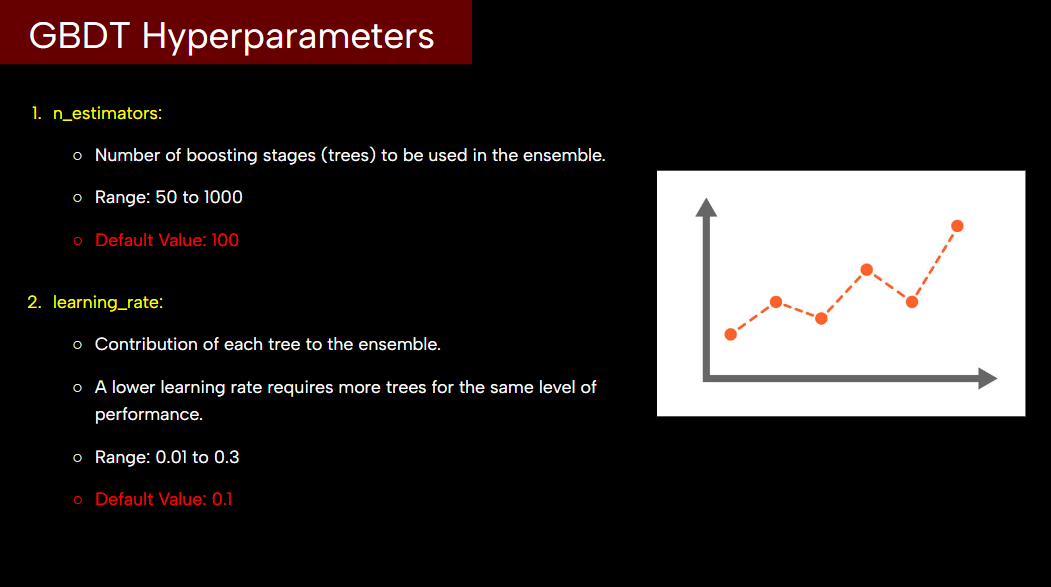

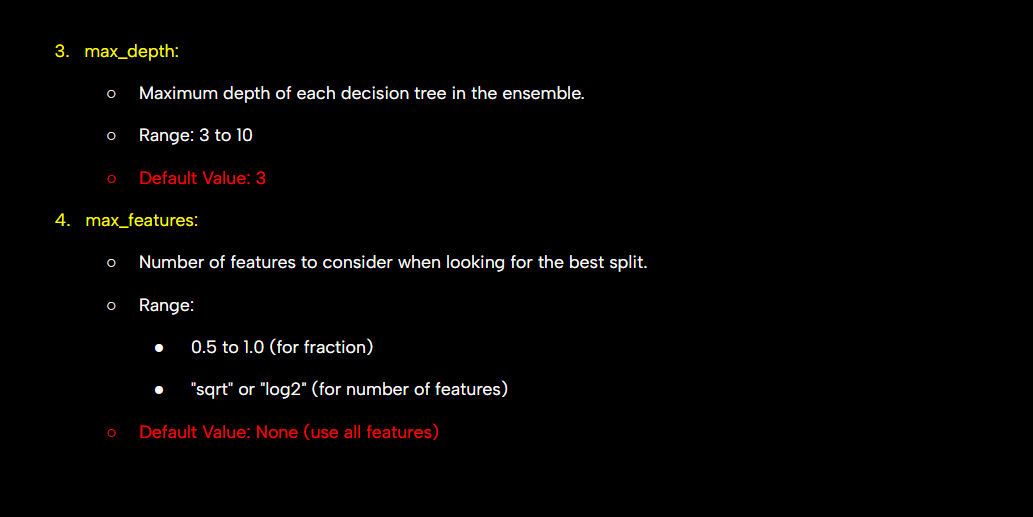

### GBDT Implementation

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  goodquality  
0      9.4        5            0  
1      9.8        5            0  
2      9.8        5            0  
3      9.8        6            0  
4      9.4        5            0

The dataset has already been splitted into training datasets X and Y above.

#### Creating and fitting the GBDT model

In [ ]:
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,max_features=5, random_state=0)

# Fit training data to GBC
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=0)

#### Checking accuracy

In [ ]:
print("Accuracy Score :",accuracy_score(Y_test, y_pred))
print("F1 Score :",f1_score(Y_test, y_pred, average='weighted'))

Accuracy Score : 0.9325
F1 Score : 0.9243479394887845


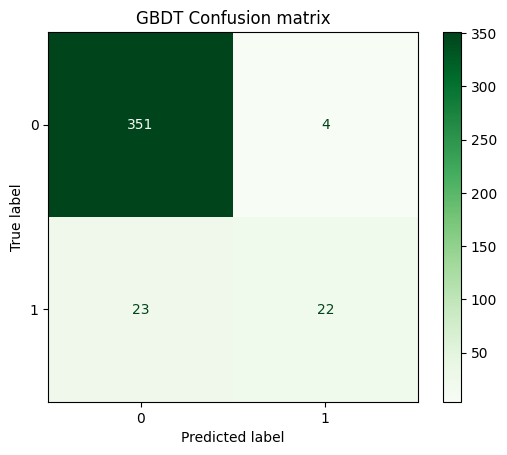

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Greens")
plt.title('GBDT Confusion matrix');


#### Hyperparameter Tuning in GBDT

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': np.arange(100, 500, 100),
    'max_features': [5, 10, 15]
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv=5)
gb_cv.fit(X_train, Y_train)

print("Best Parameters:", gb_cv.best_params_)
print("Train Score:", gb_cv.best_score_)
print("Test Score:", gb_cv.score(X_test, Y_test))


Best Parameters: {'learning_rate': 0.1, 'max_features': 15, 'n_estimators': 300}
Train Score: 0.8974267782426779
Test Score: 0.9025


---

## XGBoost

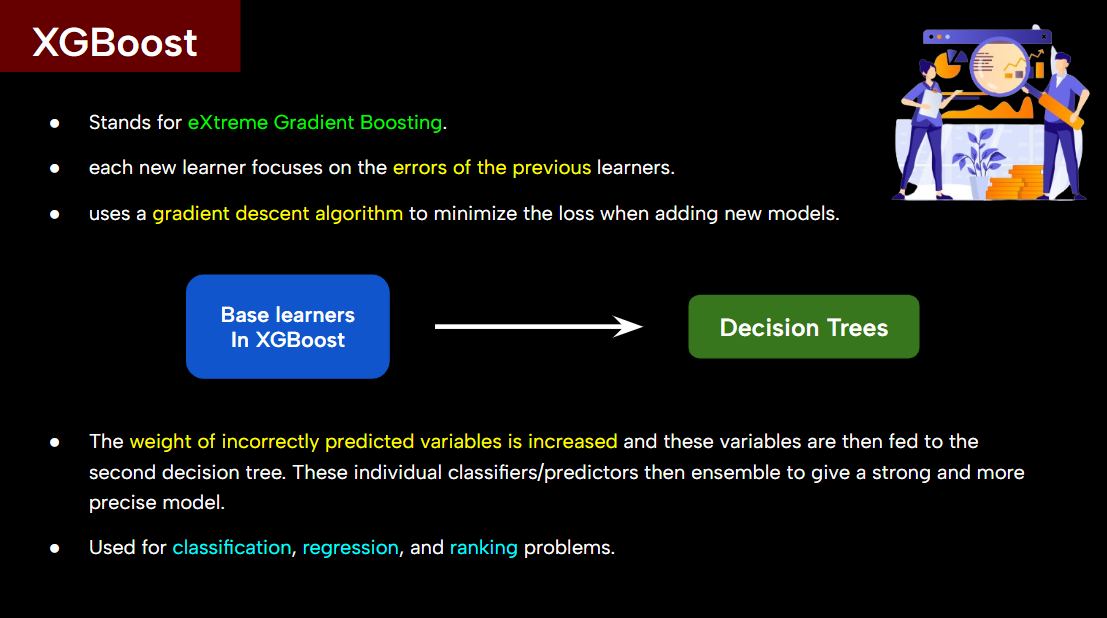

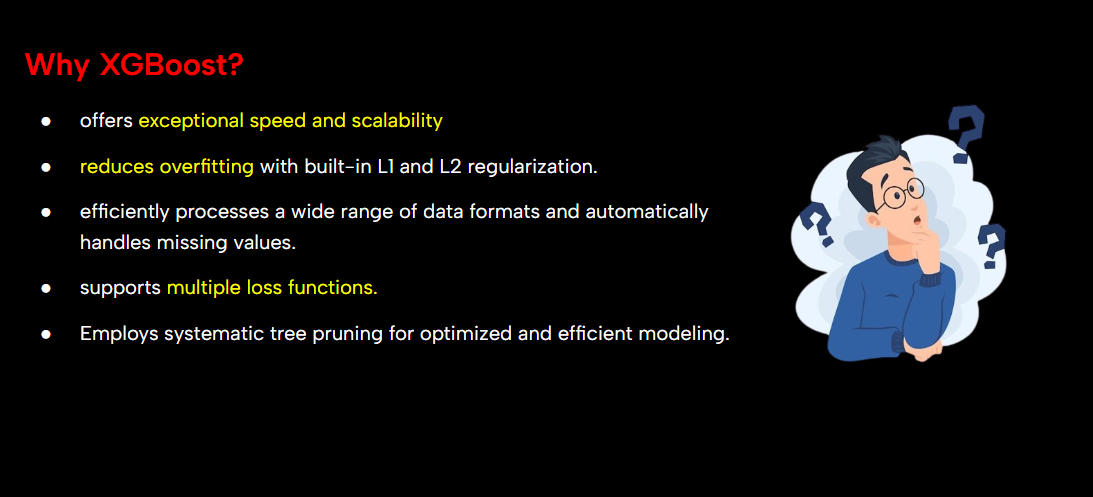

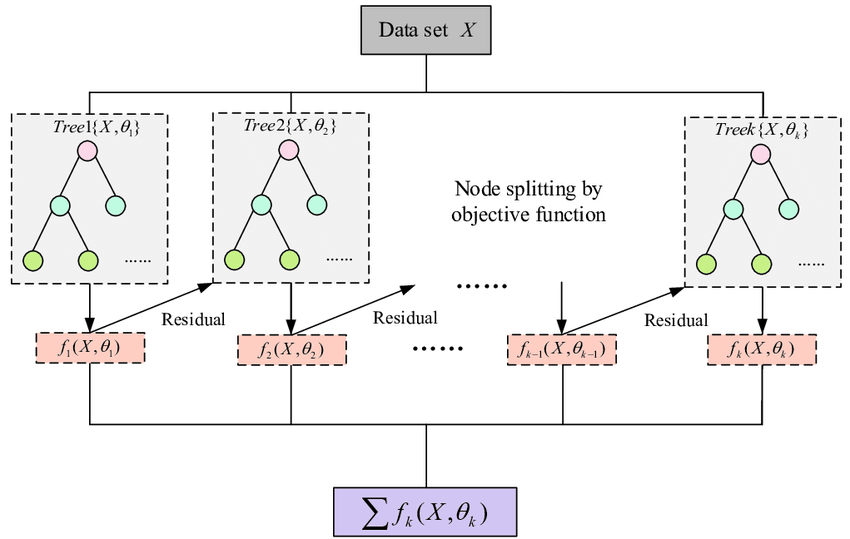

### XGBoost Implementation

#### Creating and fitting the XGBoost model

In [ ]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Checking accuracy

In [ ]:
y_pred = xgb_model.predict(X_test)

print("F1 score:",metrics.f1_score(Y_test, y_pred, average='weighted'))
print("Accuracy score:",metrics.accuracy_score(Y_test, y_pred))

F1 score: 0.9186428571428571
Accuracy score: 0.915


#### Confusion matrix

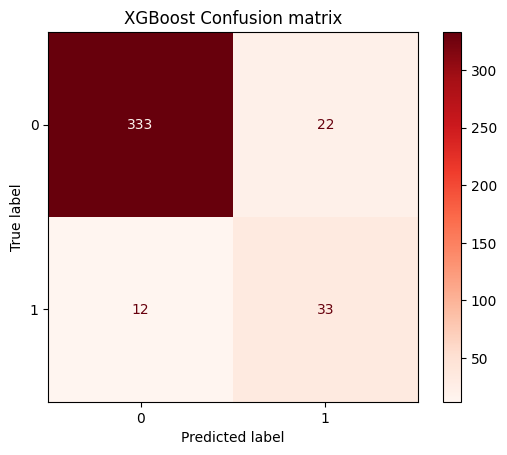

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(Y_test, y_pred, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap="Reds")
plt.title('XGBoost Confusion matrix');

---

## LightGBM

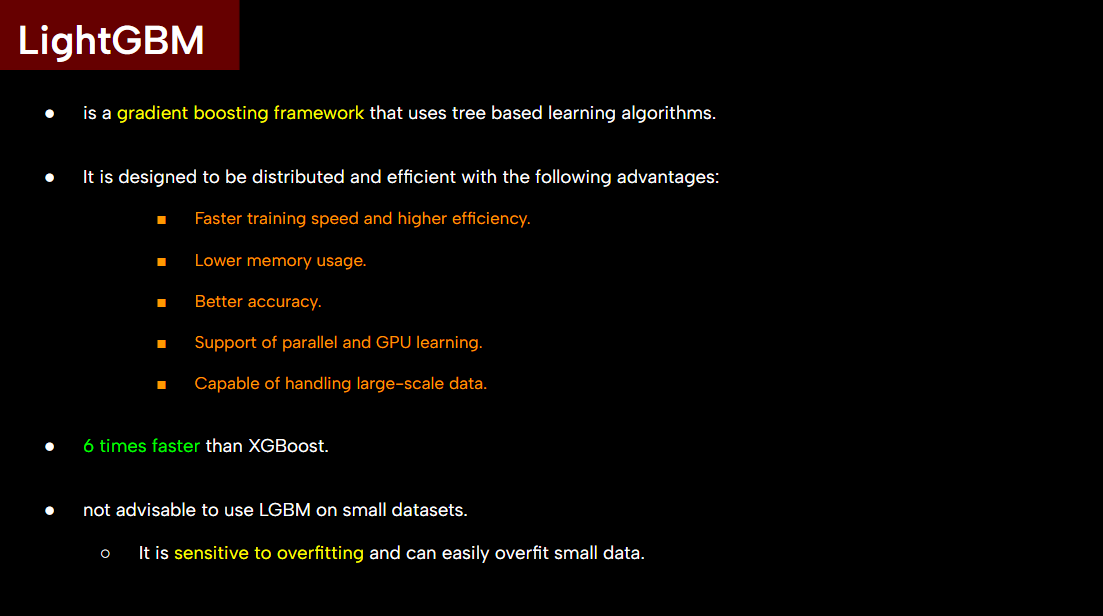

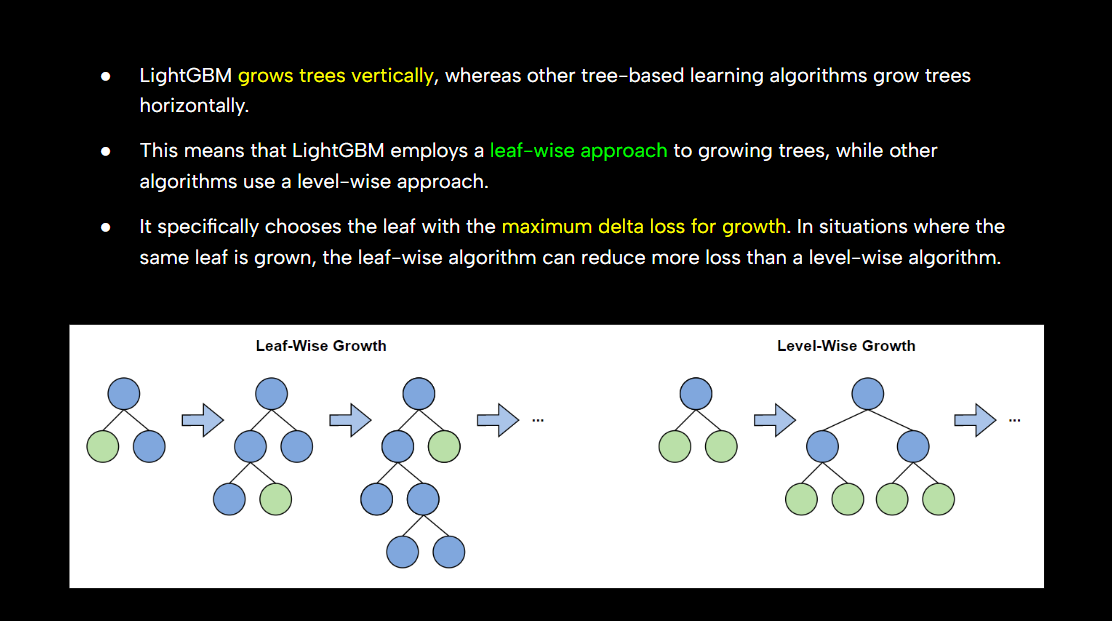

### LightGBM Hyperparameters

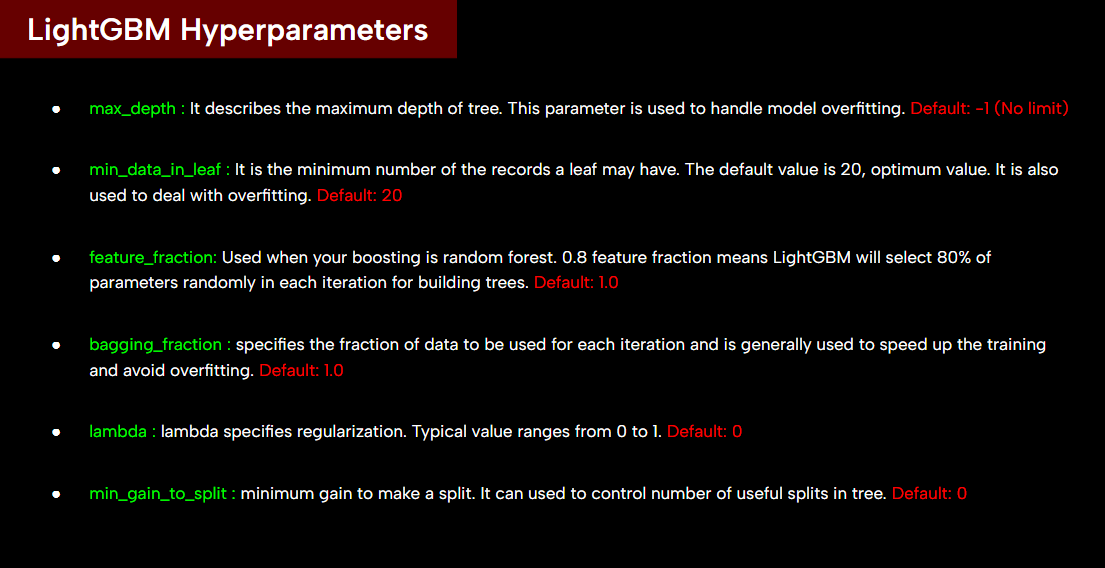

### LightGBM Implementation

#### Creating & fitting the LightGBM model

In [ ]:
lgbm = lgb.LGBMClassifier()

lgbm.fit(X_train, Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 172, number of negative: 1027
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143453 -> initscore=-1.786903
[LightGBM] [Info] Start training from score -1.786903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

#### Checking accuracy

In [ ]:
y_pred = lgbm.predict(X_test)

print("F1 score:",metrics.f1_score(Y_test, y_pred, average='weighted'))
print("Accuracy score:",metrics.accuracy_score(Y_test, y_pred))

F1 score: 0.94
Accuracy score: 0.94


#### Confusion matrix

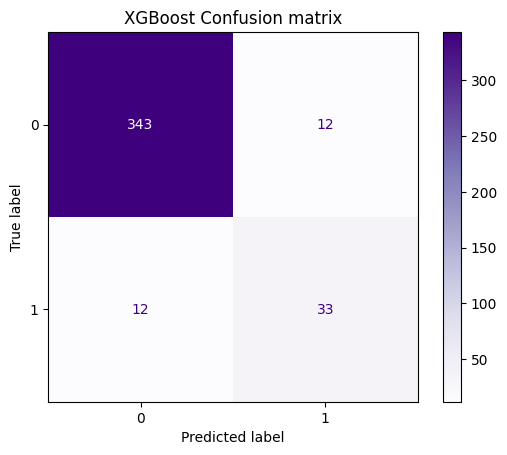

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(Y_test, y_pred, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap="Red")
plt.title('XGBoost Confusion matrix');

---

## Stacking

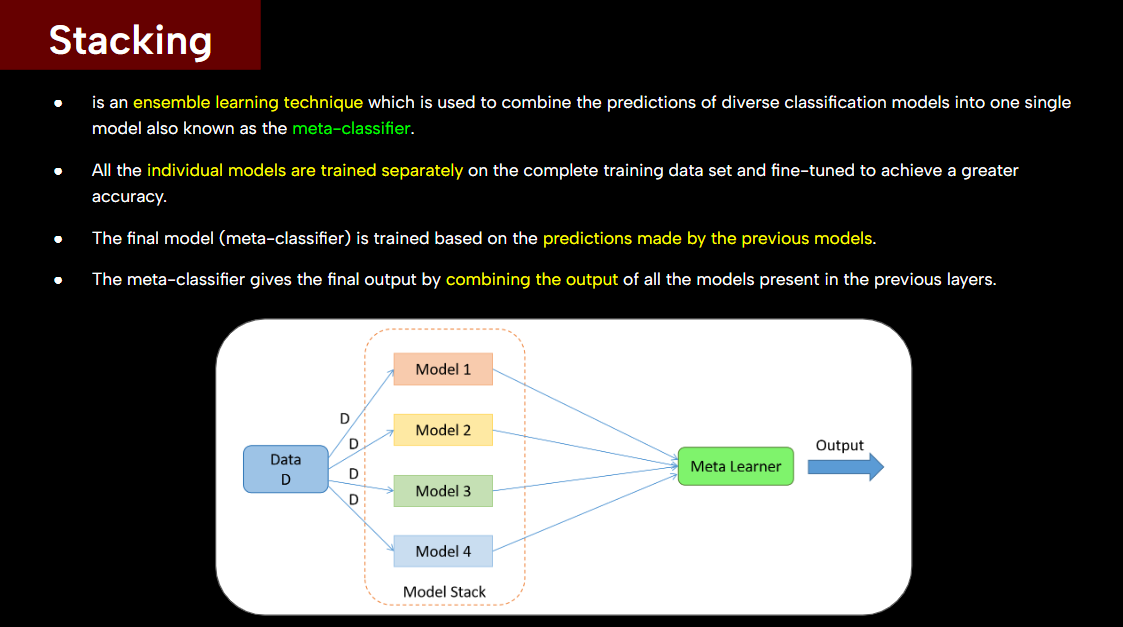

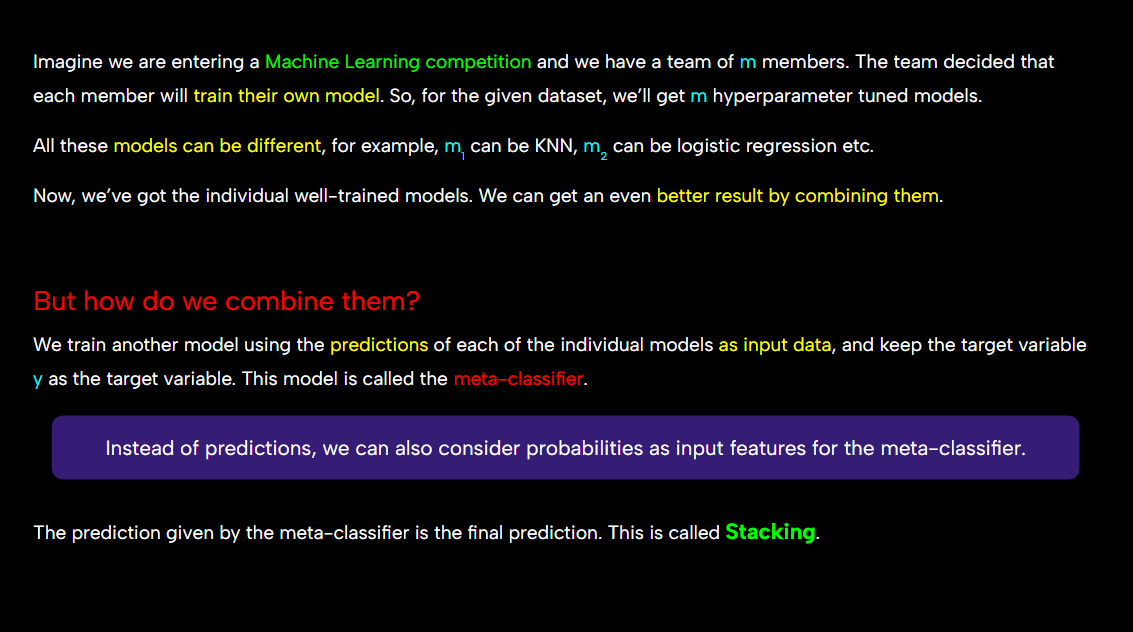

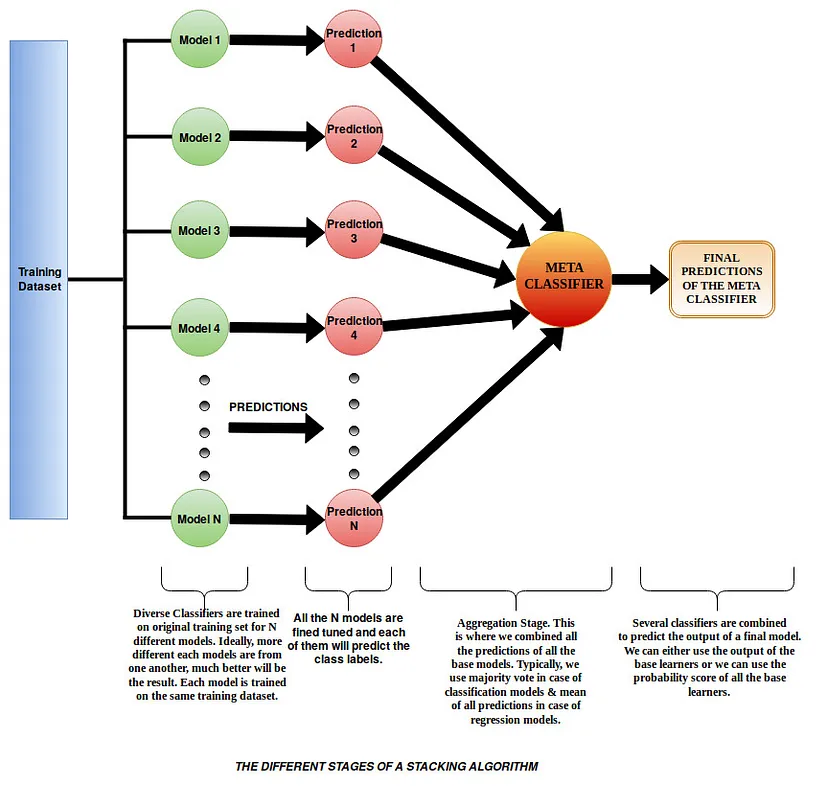


You can implement Stacking using `StackingClassifier` which can be found in the mlxtend library.<br>
Link - [StackingClassifier](https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/)

---

## Cascading

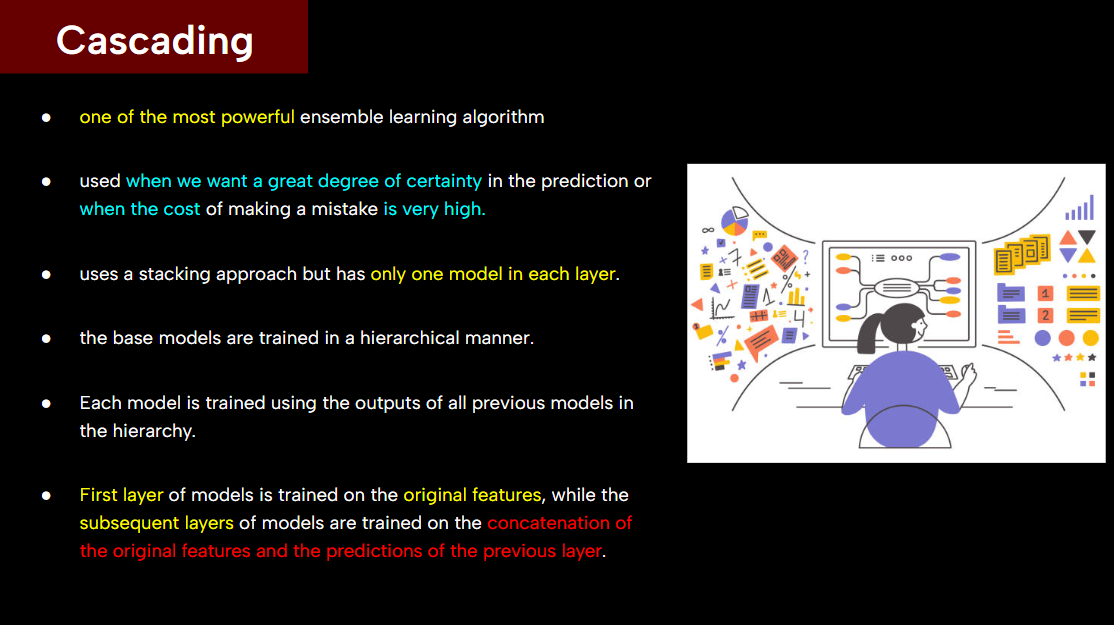

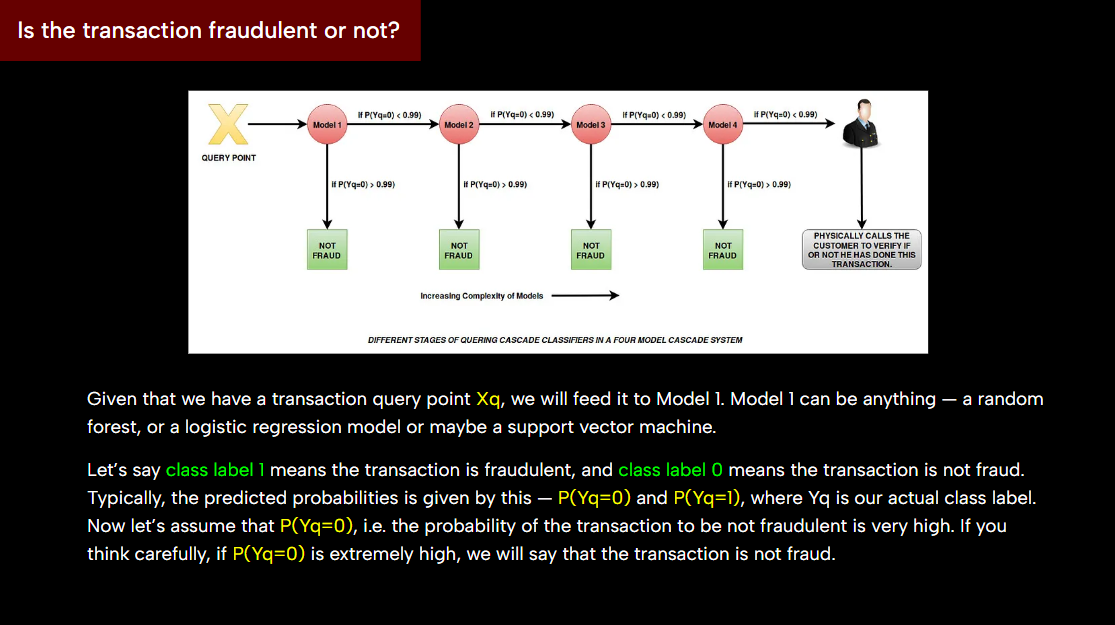

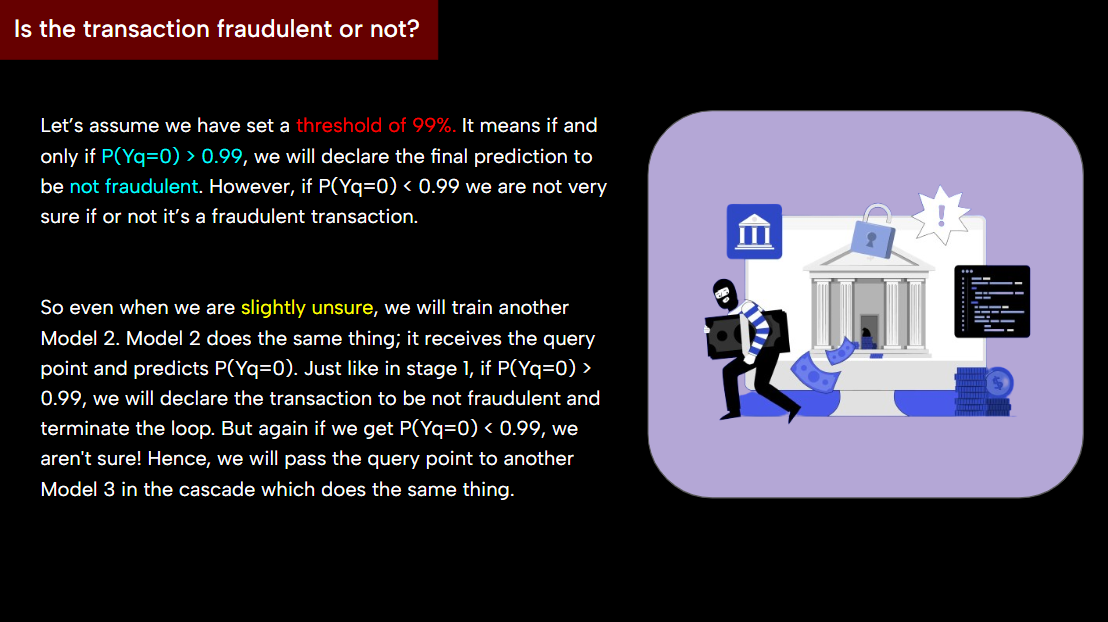

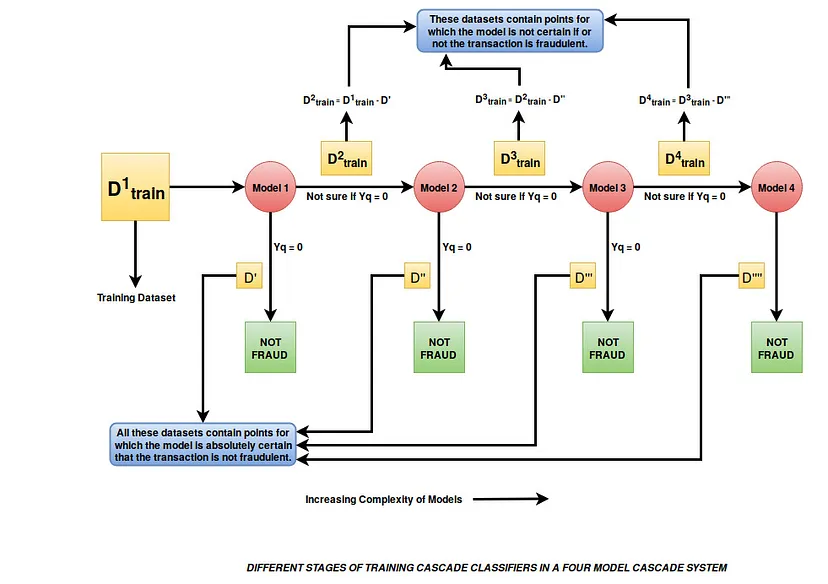

---
---